## Upgrade tensorflow

In [ ]:
pip install --upgrade tensorflow==2.3.0

In [ ]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

In [2]:
print(tf.__version__)

2.3.0


# Testing dataset loading

In [1]:
%run dataset.py

32
Found 13656 files belonging to 2 classes.
Found 1537 files belonging to 2 classes.


# Training

In [6]:
%run train.py --enet-type res_net --n-epochs 10

32
Found 13656 files belonging to 2 classes.
Found 1537 files belonging to 2 classes.
res_net
Epoch 1/10
427/427 [==============================] - ETA: 0s - loss: 5.6095 - AUC: 0.7581 - accuracy: 0.7569 - precision: 0.5708 - recall: 0.5402
Epoch 00001: saving model to ./training/cp-0001.ckpt
427/427 [==============================] - 124s 291ms/step - loss: 5.6095 - AUC: 0.7581 - accuracy: 0.7569 - precision: 0.5708 - recall: 0.5402 - val_loss: 2.0531 - val_AUC: 0.7329 - val_accuracy: 0.8699 - val_precision: 0.2889 - val_recall: 0.0718
Epoch 2/10
427/427 [==============================] - ETA: 0s - loss: 1.5800 - AUC: 0.8210 - accuracy: 0.7892 - precision: 0.6453 - recall: 0.5532
Epoch 00002: saving model to ./training/cp-0002.ckpt
427/427 [==============================] - 119s 279ms/step - loss: 1.5800 - AUC: 0.8210 - accuracy: 0.7892 - precision: 0.6453 - recall: 0.5532 - val_loss: 0.9262 - val_AUC: 0.7936 - val_accuracy: 0.8861 - val_precision: 0.5789 - val_recall: 0.1215
Epoch 3/

In [10]:
%run train.py --enet-type eff_net --n-epochs 10

32
Found 13656 files belonging to 2 classes.
Found 1537 files belonging to 2 classes.
eff_net
Epoch 1/10
427/427 [==============================] - ETA: 0s - loss: 6.3413 - AUC: 0.7625 - accuracy: 0.7583 - precision: 0.5806 - recall: 0.5018
Epoch 00001: saving model to ./training/cp-0001.ckpt
427/427 [==============================] - 120s 282ms/step - loss: 6.3413 - AUC: 0.7625 - accuracy: 0.7583 - precision: 0.5806 - recall: 0.5018 - val_loss: 2.0406 - val_AUC: 0.7604 - val_accuracy: 0.8848 - val_precision: 0.5769 - val_recall: 0.0829
Epoch 2/10
426/427 [============================>.] - ETA: 0s - loss: 1.6305 - AUC: 0.8276 - accuracy: 0.7974 - precision: 0.6826 - recall: 0.5211
Epoch 00002: saving model to ./training/cp-0002.ckpt
427/427 [==============================] - 118s 276ms/step - loss: 1.6297 - AUC: 0.8276 - accuracy: 0.7975 - precision: 0.6825 - recall: 0.5214 - val_loss: 1.1495 - val_AUC: 0.7799 - val_accuracy: 0.8842 - val_precision: 0.6000 - val_recall: 0.0497
Epoch 3/

In [1]:
%run train.py --enet-type vgg16

32
Found 13656 files belonging to 2 classes.
Found 1537 files belonging to 2 classes.
vgg16
427/427 [==============================] - ETA: 0s - loss: 9.4939 - AUC: 0.7432 - accuracy: 0.7476 - precision: 0.5540 - recall: 0.5177
Epoch 00001: saving model to ./training/cp-0001.ckpt
427/427 [==============================] - 122s 286ms/step - loss: 9.4939 - AUC: 0.7432 - accuracy: 0.7476 - precision: 0.5540 - recall: 0.5177 - val_loss: 6.0464 - val_AUC: 0.7481 - val_accuracy: 0.8783 - val_precision: 0.3500 - val_recall: 0.0387
vgg16
hello world


# Predict

In [7]:
%run predict.py --enet-type res_net 

32
Found 13656 files belonging to 2 classes.
Found 1537 files belonging to 2 classes.
[0.36261734, 0.46602115, 0.031249404, 0.5817808, 0.2385699, 0.26621953, 0.18045399, 0.4761773, 0.2293967, 0.19938436, 0.30743605, 0.19940768, 0.21876583, 0.35212237, 0.14601521, 0.18940878, 0.38146043, 0.14715445, 0.37635815, 0.14311086, 0.36081278, 0.19316886, 0.743529, 0.3844996, 0.5627156, 0.5760914, 0.43395495, 0.3471259, 0.45541164, 0.35146013, 0.32979652, 0.10701195, 0.33775187, 0.15635371, 0.1418771, 0.16914755, 0.17076884, 0.28665167, 0.3811761, 0.23697133, 0.2941242, 0.31219107, 0.50806, 0.31705526, 0.3387105, 0.22086358, 0.27987587, 0.30164826, 0.12280188, 0.13027625, 0.23552404, 0.18273301, 0.05392608, 0.07002059, 0.15994664, 0.04378327, 0.076079935, 0.13235632, 0.11351726, 0.13948601, 0.01591754, 0.029415464, 0.07990894, 0.06230812, 0.096793324, 0.19051495, 0.10998351, 0.05261559, 0.11305143, 0.16552079, 0.034577, 0.21220762, 0.05424084, 0.058498695, 0.0953999, 0.030978179, 0.065363236, 0.

In [11]:
%run predict.py --enet-type eff_net 

32
Found 13656 files belonging to 2 classes.
Found 1537 files belonging to 2 classes.


[0.2755932, 0.6705109, 0.14493795, 0.36290202, 0.1755498, 0.28092292, 0.2464529, 0.635907, 0.2415182, 0.032785535, 0.15470822, 0.17855206, 0.23523885, 0.3055432, 0.12254908, 0.25292677, 0.16517147, 0.055535477, 0.34885883, 0.33275545, 0.15549317, 0.22976828, 0.7929721, 0.38844427, 0.39962298, 0.4731631, 0.35189095, 0.2991859, 0.39966822, 0.30728003, 0.25826055, 0.23106802, 0.35373214, 0.27019316, 0.28174916, 0.10403425, 0.1830302, 0.12885876, 0.1734609, 0.2964949, 0.3054127, 0.21997653, 0.42029116, 0.28470767, 0.28018683, 0.19459379, 0.16768909, 0.15687814, 0.47693563, 0.2077641, 0.24080373, 0.16466154, 0.08612207, 0.10866247, 0.06080377, 0.08238154, 0.09709629, 0.06484285, 0.117905974, 0.08357407, 0.06971593, 0.05162069, 0.113518246, 0.1082735, 0.1333516, 0.13400412, 0.11385463, 0.14504685, 0.031484794, 0.07954969, 0.040685486, 0.1256029, 0.051708598, 0.067286216, 0.22167824, 0.0865332, 0.09333003, 0.14459066, 0.16473727, 0.053279888, 0.04869892, 0.17978132, 0.083994776, 0.35304654, 0

# Ensemble

In [12]:
%run ensemble.py

0       0.349448
1       0.556525
2       0.115852
3       0.482468
4       0.257485
          ...   
1532    0.341311
1533    0.356149
1534    0.335200
1535    0.173510
1536    0.131261
Name: preds, Length: 1537, dtype: float64


# Evaluate

32
Found 13656 files belonging to 2 classes.
Found 1537 files belonging to 2 classes.
[[1346   10]
 [ 168   13]]
AUC score: 0.8079091901758503
Accuracy: 0.8841899804814574


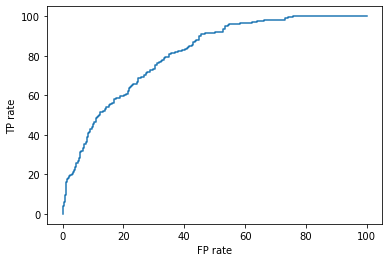

In [14]:
%run evaluate.py

### Version checking

In [2]:

import tensorflow, sklearn, pandas, numpy, re, matplotlib

print("tensorflow==" + tensorflow.__version__)
print("sklearn==" + sklearn.__version__)
print("pandas==" + pandas.__version__)
print("numpy==" + numpy.__version__)
print("re==" + re.__version__)
print("matplotlib==" + matplotlib.__version__)


tensorflow==2.3.0
sklearn==0.24.1
pandas==1.1.5
numpy==1.18.5
re==2.2.1
matplotlib==3.3.4
